## Model Notebook

---

This notebook fit a baseline model for the prediction. The models are trained on basics features, without any normalization or balancing process.
The hyperparameters are set to default values, and the models is trained on the full dataset. Sections:

- [Data Loading](#Data-Loading)
- [Fit Model](#Fit-Model)

#### Models:

- SVM with a RBF kernel: predicts correctly only artifacts and murmurs, which are the 1st and 3rd most represented classes.
- Random Forest: predicts correctly all classes but extrastoles, which is 2nd less represented class.


In [5]:
import os
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# paths the features
# FEATURES_RAW_DIR = '../features/raw/'
FEATURES_RAW_DIR = "../../features/balanced_40_filtered/"

MODELS_DIR = "../../models/"

### Data Loading


In [7]:
names = os.listdir(FEATURES_RAW_DIR)
name_labels = {}
data_list = []
data_list_name = []

for name in names:
    data = np.load(FEATURES_RAW_DIR + name)
    X = data["X"]
    y = data["y"].reshape(-1, 1)
    filename = data["filename"].reshape(-1, 1)

    # update dictionary
    name_labels[name.split("_")[0]] = y[0, 0]

    data = np.concatenate((X, y), axis=1)
    data_name = np.concatenate((data, filename), axis=1)
    data_list.append(data)
    data_list_name.append(data_name)

# sort the name_labels dictionary by the labels
name_labels = dict(sorted(name_labels.items(), key=lambda item: item[1]))

# create the full data matrix
data = np.concatenate(data_list, axis=0)
data_name = np.concatenate(
    data_list_name, axis=0
)  # data with the index of the filename in the last column

# split the data in testing and training
X_train, X_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.2, random_state=42, stratify=data[:, -1]
)

### Fit Model


#### SVM


/home/ligari/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ligari/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ligari/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test report: 
              precision    recall  f1-score   support

         0.0       0.68      0.90      0.77      1932
         1.0       0.78      0.56      0.65      1026
         2.0       0.00      0.00      0.00      1149
         3.0       0.50      0.88      0.64      2156
         4.0       0.00      0.00      0.00       777

    accuracy                           0.60      7040
   macro avg       0.39      0.47      0.41      7040
weighted avg       0.45      0.60      0.50      7040



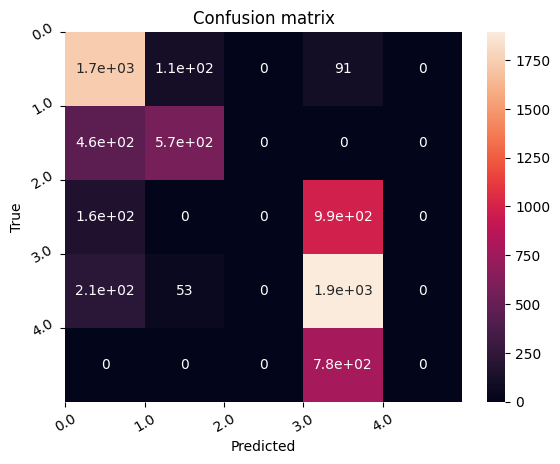

In [8]:
# fit the model
svm = SVC()
svm.fit(X_train, y_train)

# predict the test set
y_pred = svm.predict(X_test)
print(f"Test report: \n{classification_report(y_test, y_pred)}")

# save the model
joblib.dump(svm, MODELS_DIR + "svm_base.gz")

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(name_labels)), name_labels.keys(), rotation=30)
plt.yticks(np.arange(len(name_labels)), name_labels.keys(), rotation=30)
plt.show()

#### Random Forest


Test report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1932
         1.0       1.00      1.00      1.00      1026
         2.0       1.00      1.00      1.00      1149
         3.0       1.00      1.00      1.00      2156
         4.0       1.00      1.00      1.00       777

    accuracy                           1.00      7040
   macro avg       1.00      1.00      1.00      7040
weighted avg       1.00      1.00      1.00      7040

Train report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7728
         1.0       1.00      1.00      1.00      4104
         2.0       1.00      1.00      1.00      4596
         3.0       1.00      1.00      1.00      8624
         4.0       1.00      1.00      1.00      3108

    accuracy                           1.00     28160
   macro avg       1.00      1.00      1.00     28160
weighted avg       1.00      1.00      1.00     

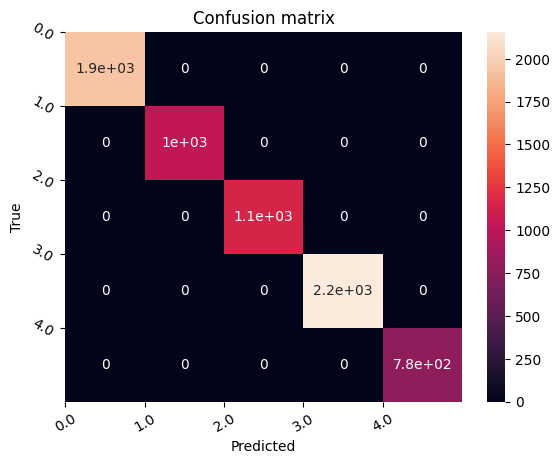

In [9]:
# fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test set
y_pred = rf.predict(X_test)
print(f"Test report: \n{classification_report(y_test, y_pred)}")

y_train_pred = rf.predict(X_train)
print(f"Train report: \n{classification_report(y_train, y_train_pred)}")
# save the model
joblib.dump(rf, MODELS_DIR + "rf_base.gz")

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(name_labels)), name_labels.keys(), rotation=30)
plt.yticks(np.arange(len(name_labels)), name_labels.keys(), rotation=-30)
plt.show()